In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
import random
import json
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

busselton au
lavrentiya ru
bengkulu id
mar del plata ar
yulara au
torbay ca
tsihombe mg
rikitea pf
kirakira sb
nishihara jp
illoqqortoormiut gl
ishigaki jp
hermanus za
hobart au
ushuaia ar
kavieng pg
bani walid ly
bluff nz
punta arenas cl
vaini to
atuona pf
ushuaia ar
kununurra au
zyryanka ru
margate za
sao joao da barra br
shelburne ca
caucaia br
rikitea pf
taolanaro mg
clyde river ca
tuatapere nz
mayo ca
taolanaro mg
cape town za
lakes entrance au
nanortalik gl
puerto ayora ec
esperance au
cape town za
bethel us
ushuaia ar
quelimane mz
kapaa us
narsaq gl
champerico gt
olafsvik is
grand river south east mu
paamiut gl
yellowknife ca
cape town za
upernavik gl
luderitz na
bredasdorp za
mataura pf
belushya guba ru
dikson ru
longido tz
la ronge ca
leningradskiy ru
cape town za
korla cn
saskylakh ru
clyde river ca
ye mm
carnarvon au
georgetown sh
busselton au
katsuura jp
kushima jp
yellowknife ca
cabo san lucas mx
upernavik gl
busselton au
taolanaro mg
dire ml
hals dk
yellowknife ca
sao fil

hasaki jp
cayenne gf
sibolga id
mataura pf
yar-sale ru
taoudenni ml
port elizabeth za
saskylakh ru
port alfred za
nikolskoye ru
havoysund no
marolambo mg
hobart au
ca mau vn
poum nc
puerto ayora ec
ushuaia ar
kloulklubed pw
kapaa us
thompson ca
ushuaia ar
burica pa
pedernales do
havoysund no
santa maria cv
presidencia roque saenz pena ar
novobelokatay ru
nome us
codrington ag
chumikan ru
rikitea pf
college us
saint-leu re
taolanaro mg
ushuaia ar
tucupita ve
christchurch nz
tuatapere nz
rikitea pf
saldanha za
upernavik gl
husavik is
busselton au
port elizabeth za
hithadhoo mv
funtua ng
washougal us
salalah om
nyrob ru
pandamatenga bw
lolua tv
saskylakh ru
takoradi gh
qaanaaq gl
kodiak us
north bend us
cape town za
karratha au
pevek ru
taolanaro mg
paamiut gl
mola di bari it
nenjiang cn
tabiauea ki
tommot ru
adra es
komsomolskiy ru
sitka us
galt us
lamu ke
punta arenas cl
clemencia co
macheng cn
dunhua cn
taolanaro mg
kansanshi zm
arraial do cabo br
puerto ayora ec
dalbandin pk
hermanus 

punta arenas cl
sao domingos br
manokwari id
punta arenas cl
berbera so
rikitea pf
punta arenas cl
bredasdorp za
shenkursk ru
avarua ck
victoria sc
jamame so
ouallam ne
carnarvon za
cayenne gf
dikson ru
hermanus za
atuona pf
igboho ng
high level ca
soyo ao
nikolskoye ru
rikitea pf
preobrazheniye ru
kargasok ru
avera pf
bluff nz
bluff nz
barda ru
isangel vu
codajas br
kapaa us
jamestown sh
codrington ag
provideniya ru
rikitea pf
mataura pf
mataura pf
busselton au
stornoway gb
caravelas br
bandarbeyla so
mar del plata ar
chokurdakh ru
pinheiro br
saint-philippe re
albany au
san jeronimo mx
batemans bay au
qaanaaq gl
georgetown sh
waingapu id
ushuaia ar
taolanaro mg
rikitea pf
carnarvon au
bethel us
lubana lv
tsihombe mg
cabo san lucas mx
iqaluit ca
vila velha br
senno by
shimoda jp
yellowknife ca
lar gerd af
taolanaro mg
qaanaaq gl
tual id
bardstown us
auch fr
avarua ck
kapaa us
la ceiba hn
bredasdorp za
ilulissat gl


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
        print("-----------------------------")
        print("Data Retrieval Complete      ")
        print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | lavrentiya
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | yulara
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kirakira
Processing Record 10 of Set 1 | nishihara
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 1 | ishigaki
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | bani walid
Proces

Processing Record 1 of Set 4 | hit
Processing Record 2 of Set 4 | iqaluit
Processing Record 3 of Set 4 | santa cruz
Processing Record 4 of Set 4 | isangel
Processing Record 5 of Set 4 | alofi
Processing Record 6 of Set 4 | sovetskiy
Processing Record 7 of Set 4 | saint george
Processing Record 8 of Set 4 | salym
Processing Record 9 of Set 4 | san patricio
Processing Record 10 of Set 4 | kruisfontein
Processing Record 11 of Set 4 | treia
Processing Record 12 of Set 4 | kushiro
Processing Record 13 of Set 4 | vestmannaeyjar
Processing Record 14 of Set 4 | ca mau
Processing Record 15 of Set 4 | port alfred
Processing Record 16 of Set 4 | ikalamavony
Processing Record 17 of Set 4 | boatlaname
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 4 | ixtapa
Processing Record 19 of Set 4 | mahibadhoo
Processing Record 20 of Set 4 | mahebourg
Processing Record 21 of Set 4 | wuda
Processing Record 22 of

Processing Record 14 of Set 7 | vila franca do campo
Processing Record 15 of Set 7 | marystown
Processing Record 16 of Set 7 | owando
Processing Record 17 of Set 7 | tawau
Processing Record 18 of Set 7 | bairiki
Processing Record 19 of Set 7 | lahti
Processing Record 20 of Set 7 | manta
Processing Record 21 of Set 7 | almansa
Processing Record 22 of Set 7 | mount pleasant
Processing Record 23 of Set 7 | erzin
Processing Record 24 of Set 7 | ketchikan
Processing Record 25 of Set 7 | airai
Processing Record 26 of Set 7 | hurricane
Processing Record 27 of Set 7 | estelle
Processing Record 28 of Set 7 | coos bay
Processing Record 29 of Set 7 | sosua
Processing Record 30 of Set 7 | molchanovo
Processing Record 31 of Set 7 | cayenne
Processing Record 32 of Set 7 | sibolga
Processing Record 33 of Set 7 | yar-sale
Processing Record 34 of Set 7 | port elizabeth
Processing Record 35 of Set 7 | nikolskoye
Processing Record 36 of Set 7 | havoysund
Processing Record 37 of Set 7 | marolambo
Processi

Processing Record 30 of Set 10 | x-can
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 10 | mizan teferi
Processing Record 32 of Set 10 | ginir
Processing Record 33 of Set 10 | huarmey
Processing Record 34 of Set 10 | uwayl
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 10 | lata
Processing Record 36 of Set 10 | hambantota
Processing Record 37 of Set 10 | moa
Processing Record 38 of Set 10 | moranbah
Processing Record 39 of Set 10 | finnsnes
Processing Record 40 of Set 10 | gornoye loo
Processing Record 41 of Set 10 | alice springs
Processing Record 42 of Set 10 | sao felix do xingu
Processing Record 43 of Set 10 | marawi
Processing Record 44 of Set 10 | ampanihy
Processing Record 45 of Set 10 | waspan
Processing Record 46 of Set 10 | touros
Processing Record 47 of Set 10 | mirnyy
Processing 

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,57.09,73,97,15.86,AU,2021-07-24 20:13:23
1,Lavrentiya,65.5833,-171.0000,45.52,98,100,10.94,RU,2021-07-24 20:13:23
2,Bengkulu,-3.8004,102.2655,75.06,88,9,4.21,ID,2021-07-24 20:13:24
3,Mar Del Plata,-38.0023,-57.5575,52.00,56,75,14.00,AR,2021-07-24 20:13:24
4,Yulara,-25.2406,130.9889,40.84,65,52,5.75,AU,2021-07-24 20:13:24
5,Torbay,47.6666,-52.7314,70.88,76,60,11.16,CA,2021-07-24 20:13:25
6,Rikitea,-23.1203,-134.9692,69.21,54,0,0.89,PF,2021-07-24 20:13:25
7,Kirakira,-10.4544,161.9205,79.39,86,100,5.97,SB,2021-07-24 20:13:25
8,Nishihara,26.1842,127.7558,80.26,97,90,17.27,JP,2021-07-24 20:13:26
9,Ishigaki,24.3448,124.1572,84.15,85,100,27.74,JP,2021-07-24 20:13:26


In [15]:
reorder_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[reorder_column]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-07-24 20:13:23,-33.6500,115.3333,57.09,73,97,15.86
1,Lavrentiya,RU,2021-07-24 20:13:23,65.5833,-171.0000,45.52,98,100,10.94
2,Bengkulu,ID,2021-07-24 20:13:24,-3.8004,102.2655,75.06,88,9,4.21
3,Mar Del Plata,AR,2021-07-24 20:13:24,-38.0023,-57.5575,52.00,56,75,14.00
4,Yulara,AU,2021-07-24 20:13:24,-25.2406,130.9889,40.84,65,52,5.75


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1627163910.8634844

In [20]:
today = time.strftime('%x')
today

'07/24/21'

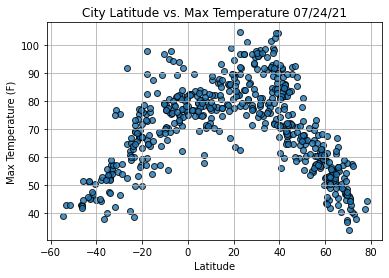

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

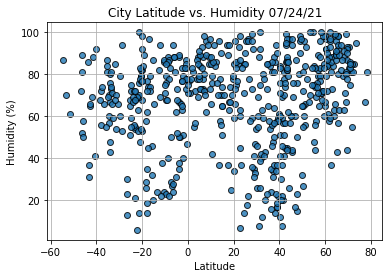

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

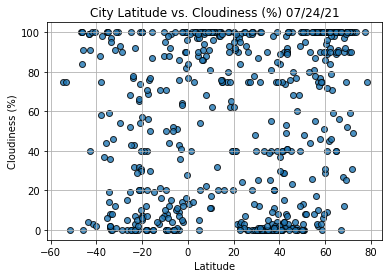

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

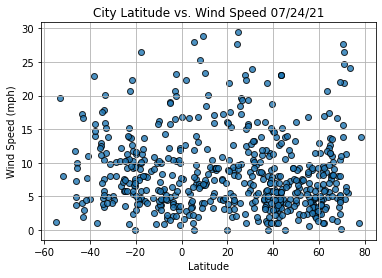

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                      Kavieng
Country                        PG
Date          2021-07-24 20:13:27
Lat                       -2.5744
Lng                      150.7967
Max Temp                     81.7
Humidity                       77
Cloudiness                     14
Wind Speed                  10.27
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
550     True
551    False
552     True
553     True
554     True
Name: Lat, Length: 555, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lavrentiya,RU,2021-07-24 20:13:23,65.5833,-171.0000,45.52,98,100,10.94
5,Torbay,CA,2021-07-24 20:13:25,47.6666,-52.7314,70.88,76,60,11.16
8,Nishihara,JP,2021-07-24 20:13:26,26.1842,127.7558,80.26,97,90,17.27
9,Ishigaki,JP,2021-07-24 20:13:26,24.3448,124.1572,84.15,85,100,27.74
14,Bani Walid,LY,2021-07-24 20:09:16,31.7566,13.9942,80.10,40,0,13.20


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

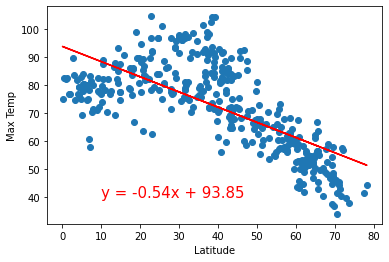

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

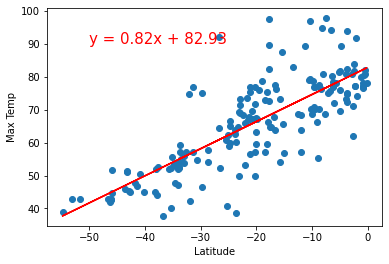

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

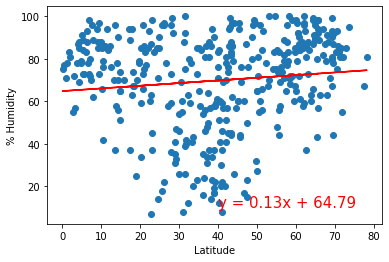

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

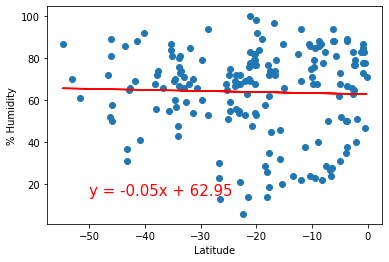

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

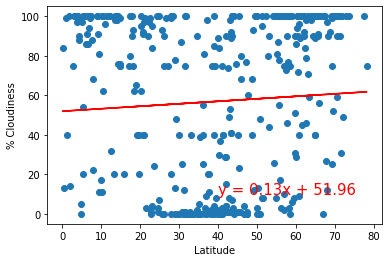

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

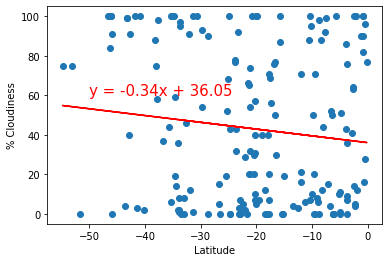

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

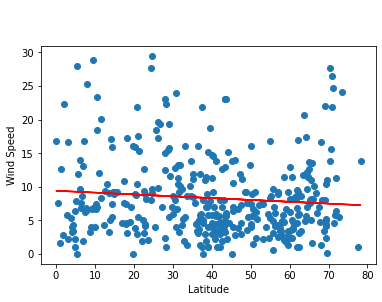

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

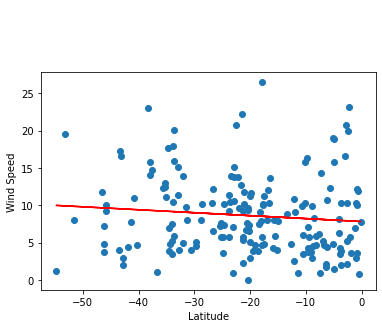

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))